
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

### Conteo de frecuencias de los lenguajes de programación



Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower().replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '') for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:30]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


In [ ]:
# Get a list with the N=30 most frequent language
# Hypothesis: less frequence languages offer limited statistical
# relevance to study their expected salary
language_list = language_count[['language']]
language_list = language_list[language_list.language != "ninguno"]
#language_list.remove('ninguno')
language_list = language_list[:30]
language_list

,language
0,javascript
1,sql
2,html
3,python
4,java
5,css
6,bash/shell
7,php
8,.net
9,typescript


In [ ]:
# Filter interesting languages based on the list above
popular_df_lang = df_lang.loc[df_lang['programming_language'].isin(language_list.language)]
popular_df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."


In [ ]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    # Computing IQR
    Q1 = dataset[column_name].quantile(0.25)
    Q3 = dataset[column_name].quantile(0.75)
    IQR = Q3 - Q1  
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (Q3+1.5*IQR))
    mask_outlier &= (interesting_col >= (Q1-1.5*IQR))
    return dataset[mask_outlier]
df_lang_limpio = clean_outliers(popular_df_lang, "salary_monthly_NETO")
df_lang_limpio[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [ ]:
df_lang_limpio["salary_monthly_NETO"].quantile([.90, .95, .98, .99, .995, .998])

0.900    130000.0
0.950    150000.0
0.980    175000.0
0.990    180000.0
0.995    188938.0
0.998    190000.0
Name: salary_monthly_NETO, dtype: float64

In [ ]:
# Asumimos que los que tienen un salario alto son los que estan en el percentil 90
high_salary = df_lang_limpio.salary_monthly_NETO.quantile(0.9)
high_salary

130000.0

En esta parte nos quedamos con el 90-percentil de mejores salarios ¡estos sí que son los mejores salarios de la muestra!

Queremos analizar para los lenguajes de uso mas frecuente cuál es la probabilidad de estar entre los que cobra los mejores salarios.

Para esto calculamos la probabilidad condicional:

$X$= cobrar un salario dentro del 90-percentil de mejores salarios en la muestra (mejor al 90%)

$L_i$= usar el lenguaje de programación $i$

Calculamos $P(X|L_i)=\frac{P\left(X \ \cap \ L_{i}\right)}{P(L_{i})}$ para cada lenguaje $i$ dentro de los lenguajes de uso mas frecuente dentro de la muestra

In [ ]:
high_salary_df = df_lang_limpio[df_lang_limpio.salary_monthly_NETO > high_salary]

d = {'programming_language': [], 'total_programmers': [], 'high_salary_programmers': []}
proba = pd.DataFrame(data=d)
for pl in language_list.iterrows():
  pl = pl[1][0] # me quedo con la columna y fila donde esta el lenguaje
  proba.loc[len(proba)] = [pl,len(df_lang_limpio[df_lang_limpio.programming_language == pl]),len(high_salary_df[high_salary_df.programming_language == pl])]
proba["prob"] = proba['high_salary_programmers']/proba["total_programmers"]
proba = proba.sort_values("prob",ascending=False)
proba

,programming_language,total_programmers,high_salary_programmers,prob
18,scala,91.0,33.0,0.362637
24,objective-c,39.0,11.0,0.282051
15,kotlin,164.0,36.0,0.219512
11,go,245.0,47.0,0.191837
19,swift,83.0,15.0,0.180723
16,groovy,145.0,24.0,0.165517
17,ruby,113.0,17.0,0.150442
27,dart,38.0,5.0,0.131579
25,delphi,38.0,5.0,0.131579
6,bash/shell,890.0,111.0,0.124719


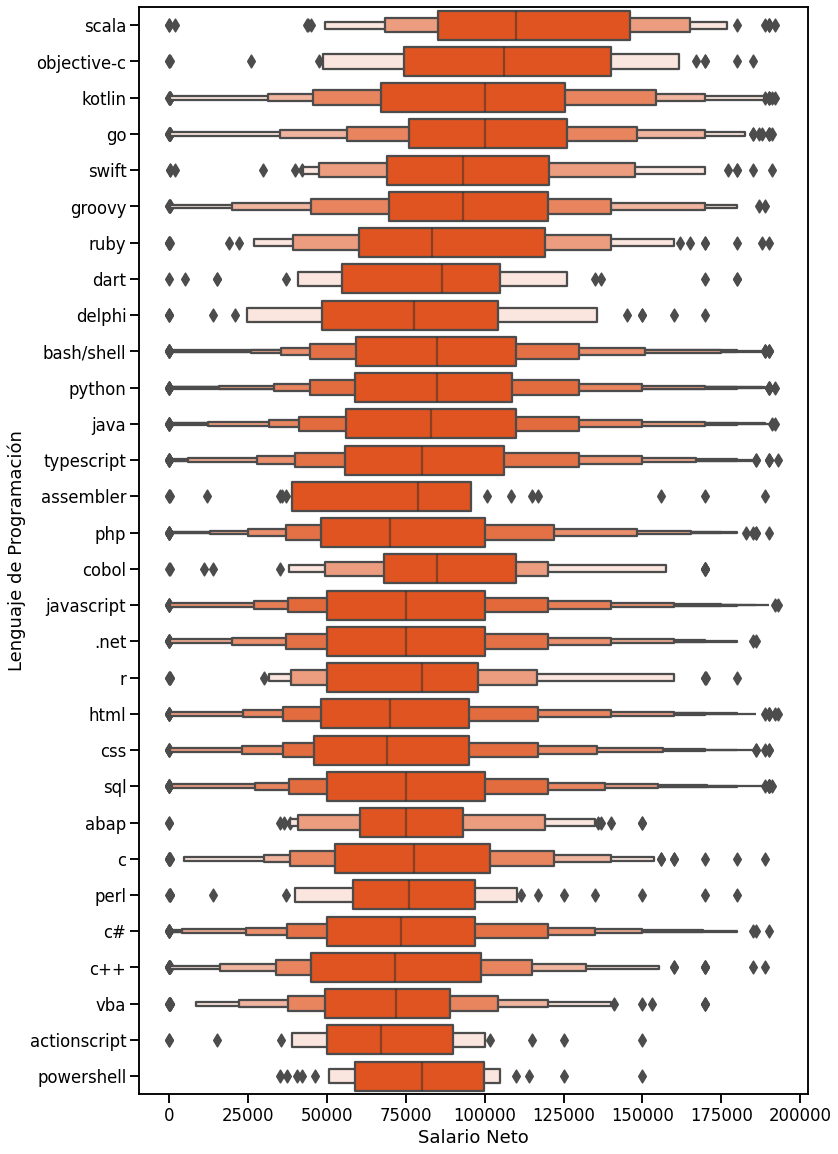

In [ ]:
plt.figure(figsize=(12, 20))
axes = seaborn.boxenplot(data=df_lang_limpio, x="salary_monthly_NETO", y='programming_language',
                color='orangered', order=proba.programming_language)
axes.set(xlabel='Salario Neto', ylabel='Lenguaje de Programación')
plt.ticklabel_format(style='plain', axis='x')

Podemos observar que aquellas personas que programan en Scala tienen más chances de cobrar los mejores salarios. Dentro de la muestra, el 36% de quienes programan en este lenguaje están en el mejor escalafón salarial. 

La probabilidad de estar entre quienes cobran los mejores salarios de aquellas personas que programan en lenguajes modernos como Go, Ruby o Python está apenas por encima del 12%.

Es interesante notar que lenguajes clásicos como C o C++ están al final de la lista. Dentro de la muestra quienes programan en estos lenguajes suelen cobrar salarios más bajos.

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["Python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


**Resolución**

Para entender si dos variables aleatorias estan correlacionadas calculamos la covarianza entre ellas y la matriz de correlacion (Pearson).


Una de las variables será el salario mensual NETO y otra variable el salario mensual BRUTO.


In [ ]:
# limpiamos outliers 
df_sin_outliers =clean_outliers(df, "salary_monthly_NETO")
df_sin_outliers =clean_outliers(df_sin_outliers, "salary_monthly_BRUTO")

mask = ((df_sin_outliers.salary_monthly_BRUTO-df_sin_outliers.salary_monthly_NETO)/df_sin_outliers.salary_monthly_BRUTO >= 0.01)
mask &= ((df_sin_outliers.salary_monthly_BRUTO-df_sin_outliers.salary_monthly_NETO)/df_sin_outliers.salary_monthly_BRUTO <= 0.99)
df_sin_outliers = df_sin_outliers[mask]

#calculamos la matriz de covarianza
datos_cov = pd.DataFrame(df_sin_outliers,columns=["salary_monthly_NETO","salary_monthly_BRUTO"])
#datos_cov.cov()
datos_cov.corr()

,salary_monthly_NETO,salary_monthly_BRUTO
salary_monthly_NETO,1.000000,0.962781
salary_monthly_BRUTO,0.962781,1.000000


Si el coeficiente de correlación es cercano a 1 las variables están linealmente correlacionadas.

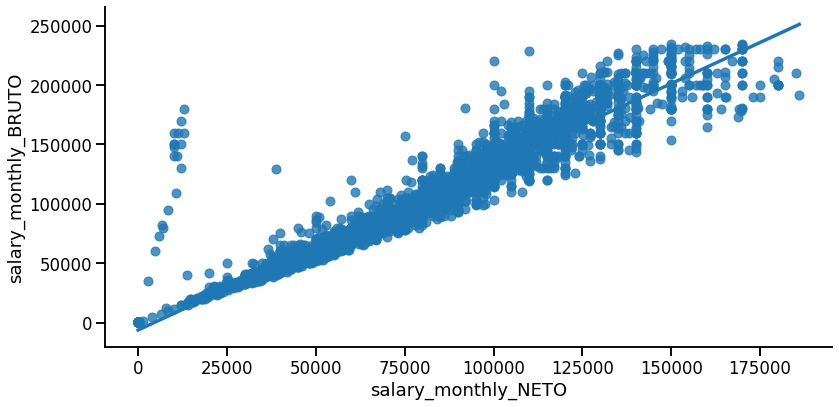

In [ ]:
#seaborn.scatterplot(data=df_sin_outliers, x = 'salary_monthly_NETO', y = 'salary_monthly_BRUTO')
seaborn.lmplot(data=df_sin_outliers, x = 'salary_monthly_NETO', y = 'salary_monthly_BRUTO', height=6, aspect=2)

Como podemos observar, las variables que representan el salario neto y el salario bruto están correlacionadas, esto significa que podríamos eliminar la pregunta del salario mensual bruto para simplificar la encuesta.

Definimos dos sub-poblaciones:

A= personas con nivel educativo Universitario completo o superior.

B= personas con nivel educativo Universitario incompleto o inferior.

**Densidad condicional:**

$X$= nivel de salarios

Distribución del nivel de salarios en el grupo A: 
$f_{X|A}(x|a)=\frac{f(x,a)}{f_A(a)}$

Distribución del nivel de salarios en el grupo B: 
$f_{X|B}(x|b)=\frac{f(x,b)}{f_B(b)}$

Si el nivel de salarios fuera independiente del nivel de estudios, la distribución de salarios en cada grupo sería igual a la distribución de salarios en general.

$f_{X|A}(x|a)=f_X(x)$

$f_{X|B}(x|b)=f_X(x)$

In [ ]:
df_subp = df[["profile_studies_level", "salary_monthly_NETO", "profile_studies_level_state", "profile_age"]]
df_subp = clean_outliers(df_subp, "salary_monthly_NETO")
df_subp.profile_studies_level_state.unique() 

array(['En curso', 'Completado', 'Incompleto'], dtype=object)

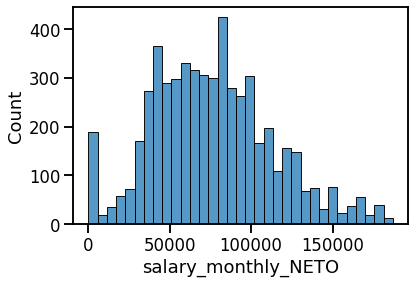

In [ ]:
#distribucion de salarios en la muestra
seaborn.histplot(data=df_subp,x="salary_monthly_NETO")

In [ ]:
df_a = df_subp[((df_subp.profile_studies_level == "Universitario") & (df_subp.profile_studies_level_state == "Completo")) | (df_subp.profile_studies_level == "Doctorado") | (df_subp.profile_studies_level == "Posdoctorado") | (df_subp.profile_studies_level == "Posgrado")]
df_a = df_a.copy()
df_a["Poblacion"] = "A"
df_b = df_subp[((df_subp.profile_studies_level == "Universitario") & (df_subp.profile_studies_level_state == "Incompleto")) | ((df_subp.profile_studies_level == "Universitario") & (df_subp.profile_studies_level_state == "En curso")) | (df_subp.profile_studies_level == "Primario") | (df_subp.profile_studies_level == "Secundario") | (df_subp.profile_studies_level == "Terciario")]
df_b = df_b.copy()
df_b["Poblacion"] = "B"
df_poblaciones = pd.concat([df_a,df_b])
df_poblaciones

,profile_studies_level,salary_monthly_NETO,profile_studies_level_state,profile_age,Poblacion
3,Posgrado,102000.000,Incompleto,39,A
82,Posgrado,34500.000,Incompleto,40,A
116,Posgrado,100000.000,En curso,27,A
118,Posgrado,100000.000,Completado,29,A
159,Posgrado,150000.000,Completado,39,A
...,...,...,...,...,...
6090,Terciario,97000.000,Completado,37,B
6091,Universitario,71000.000,En curso,38,B
6092,Terciario,45.753,En curso,24,B
6093,Terciario,72.000,En curso,28,B


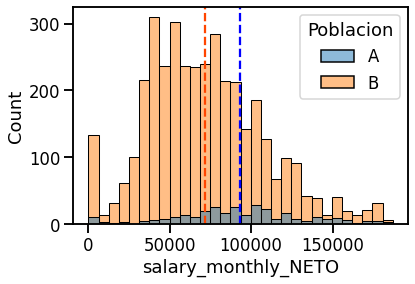

In [ ]:
#poblaciones A y B
seaborn.histplot(data=df_poblaciones,x="salary_monthly_NETO",hue="Poblacion")
#media de pob A
plt.axvline(df_a["salary_monthly_NETO"].mean(), color='blue',
            linestyle='--', label='Media')
#media de pob B
plt.axvline(df_b["salary_monthly_NETO"].mean(), color='orangered',
            linestyle='--', label='Media')

En el gráfico podemos observar que el promedio de los salarios de la población con nivel de estudios superior es más alto que el promedio de salarios de los que tienen menor nivel de estudios.

Esto nos da la pauta de que las variables que representan la distribución salarial y el nivel de estudios no son independientes.

Elegimos tres variables numéricas y dos categóricas para visualizar los datos y tratar de interpretarlos.


Variables numéricas:

*   profile_age
*   profile_years_experience
*   salary_monthly_BRUTO


Variables categóricas:

*   profile_gender
*   profile_studies_level

En cada gráfico se representan las distribuciones marginales y la distribución conjunta de las variables numéricas, condicionado a alguna variable categórica.

In [ ]:
df_nuevo = df[["profile_gender","profile_studies_level","profile_age", "profile_years_experience", "salary_monthly_BRUTO"]]

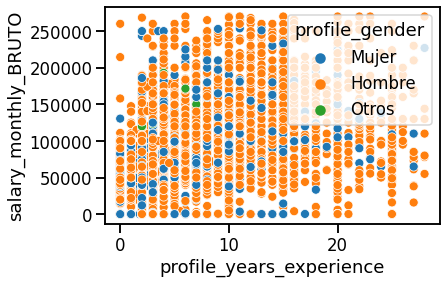

In [ ]:
df_nuevo_limpio = clean_outliers(df_nuevo, "profile_years_experience")
df_nuevo_limpio = clean_outliers(df_nuevo_limpio, "profile_age")
df_nuevo_limpio = clean_outliers(df_nuevo_limpio, "salary_monthly_BRUTO")


seaborn.scatterplot(data = df_nuevo_limpio, x="profile_years_experience",y="salary_monthly_BRUTO", hue="profile_gender")

El scatterplot no nos ayuda a entender la distribución porque la mayoría de los datos corresponden a género "Hombre". Además, sería conveniente agrupar los datos en rangos de "años de experiencia" por ejemplo: menos de 5 años, entre 5 y 10 años, entre 10 y 15 años, etc.

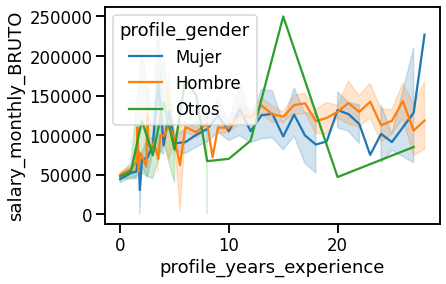

In [ ]:
#estuve tratando de mejorar el tamaño de este grafico pero no lo logre =(
seaborn.lineplot(data = df_nuevo_limpio, x="profile_years_experience",y="salary_monthly_BRUTO", hue="profile_gender")

Este gráfico es más claro que el anterior. 

Al tener pocos datos de género "Otros", se ve poca dispersión alrededor de la línea y cambios muy abruptos en color verde.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


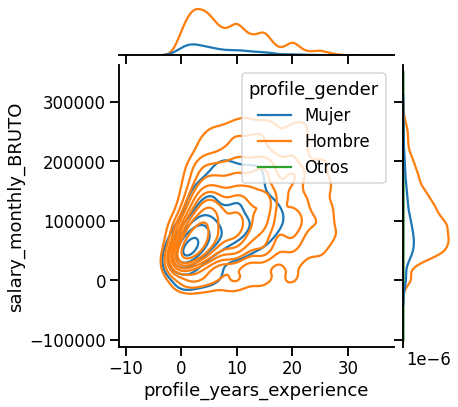

In [ ]:
seaborn.jointplot(data = df_nuevo_limpio, x="profile_years_experience",y="salary_monthly_BRUTO", hue="profile_gender", kind="kde")

#seaborn.jointplot(data = df_nuevo_limpio, x="profile_years_experience",y="salary_monthly_BRUTO", hue="profile_gender",kind="kde",thresh=.2, levels=5)

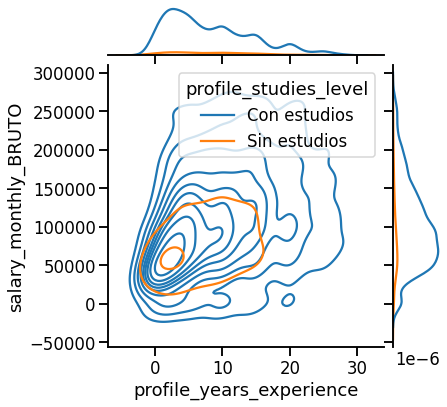

In [ ]:
df_estudiosjuntos = df_nuevo_limpio.replace("Universitario", "Con estudios")
df_estudiosjuntos.replace("Posgrado", "Con estudios",inplace=True)
df_estudiosjuntos.replace("Doctorado", "Con estudios",inplace=True)
df_estudiosjuntos.replace("Posdoctorado", "Con estudios",inplace=True)
df_estudiosjuntos.replace("Terciario", "Con estudios",inplace=True)
df_estudiosjuntos.replace("Secundario", "Sin estudios",inplace=True)
df_estudiosjuntos.replace("Primario", "Sin estudios",inplace=True)
seaborn.jointplot(data = df_estudiosjuntos, x="profile_years_experience",y="salary_monthly_BRUTO", hue="profile_studies_level",kind="kde")

Se puede ver que las personas con más años de experiencia son personas que tienen mayor nivel de estudios y cobran los salarios más altos.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


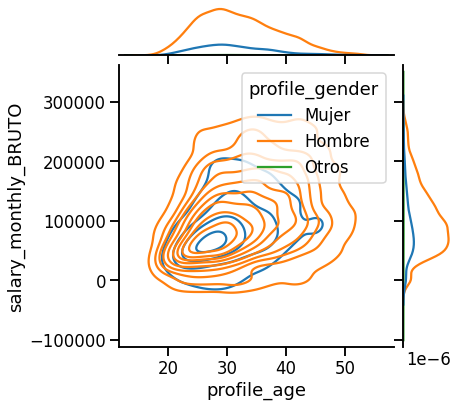

In [ ]:
#seaborn.jointplot(data = df_nuevo_limpio, x="profile_age",y="salary_monthly_BRUTO", hue="profile_gender", kind="kde")
seaborn.jointplot(data = df_nuevo_limpio, x="profile_age",y="salary_monthly_BRUTO", hue="profile_gender", kind="kde")